#### Wesleyan University ASTR 221

## Problem Set 2.2: Interpolating scaling relations across cosmic time

**(1 point) Your Name:**
Joshua Grajales

In this problem set, we will be using measurements from the literature of the stellar mass function (SMF) and star-forming sequence (SFS) at multiple redshifts to calculate the evolution of the cosmic star formation rate density $\rho_{\rm SFR}$.

The SMF and SFS were not measured at the same redshifts, so you will have to **interpolate** them to the same redshifts in order to perform the calculation.

I will ask you to perform both a linear interpolation, and a cubic spline interpolation.  For the cubic spline, you may use scipy's interp1d function, but **for the linear interpolation, you should write your own code**.  (You are welcome to use the code from Tutorial 3 as a base and modify it to fit your needs.)

Fill in your code below to complete the calculations and produce the indicated outputs.  Save your work in this notebook file and submit it by re-uploading it to Moodle (in .ipynb format).  I will check your work by going to Kernel -> Restart and Run All in the menu above so I suggest you do the same before submitting!

Good coding practice (e.g., organization and commenting) is not an explicit part of my grading rubric, but it will make it a lot easier for me to parse your code in the event that something is incorrect.  You are likely to get much more partial credit if your code is well-commented and I can understand what you were trying to do!

I'll start off by importing a few packages for you:

In [160]:
%matplotlib inline

In [161]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
from math import pi
from scipy.interpolate import interp1d

The code below constructs and plots the stellar mass function of star-forming galaxies at several redshifts from $z=0$ to $z=2.75$ based on results from the astronomical literature.  After executing this block, you will have the following arrays and variables in memory:

- ```nz_smf``` **(int)**: The number of redshifts at which the SMF was measured.
- ```z_smf``` **(1D array of length nz_smf)**: The redshifts at which the SMF was measured.
- ```nm``` **(int)**: The number of masses at which the SMF was measured.
- ```logm``` **(1D array of length nm)**: The logarithm of the masses at which the SMF was measured, in units of M$_\odot$.  Equally spaced from $\log M = 9$ to $12$ with $d\log M$ = 0.1.
- ```phi``` **(2D array of shape (nz_smf, nm))**: The number density of star-forming galaxies at redshift ```z_smf[i]``` with log stellar mass ```logm[j]```, in units of Mpc$^{-3}$ dex$^{-1}$.

To understand the units of the mass function, recall that it is usually defined as $\Phi(M) = dn/dM$, such that the number density of galaxies $n$ between mass $M_1$ and $M_2$ is
$$ n = \int_{M_1}^{M_2} \Phi(M) dM. $$
The presence of "dex$^{-1}$" in the units of $\Phi$ indicates that this mass function has been defined with respect to $\log(M)$ rather than $M$, i.e. $\Phi(\log M)$ = $dn/d\log M$ and
$$ n = \int_{\log M_1}^{\log M_2} \Phi(\log M) d\log M.$$

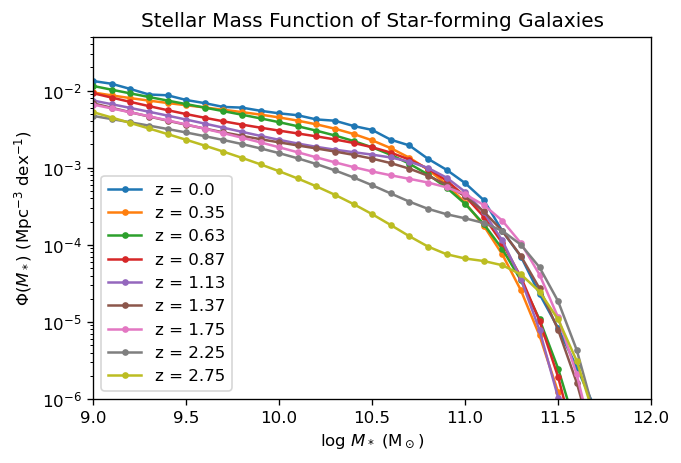

In [162]:
# Just execute this block - no coding necessary

z_smf = np.array([0, 0.35, 0.63, 0.87, 1.13, 1.37, 1.75, 2.25, 2.75])
nz_smf = len(z_smf)

mmin = 9
mmax = 12
nm = 31
logm = np.linspace(mmin, mmax, nm)

# Tomczak+14 - mass functions of SFing galaxies at z > 0.3
Mstar = np.array([0, 10.59, 10.65, 10.56, 10.44, 10.69, 10.59, 10.58, 10.61])
alpha1 = np.array([0, -1.08, -0.97, -0.46, 0.53, -0.55, 0.75, 2.06, 2.36])
norm1 = np.array([0, -2.67, -2.97, -2.81, -2.98, -3.04, -3.37, -4.3, -4.95])
alpha2 = np.array([0, -2, -1.58, -1.61, -1.44, -1.62, -1.47, -1.38, -1.67])
norm2 = np.array([0, -4.46, -3.34, -3.36, -3.11, -3.59, -3.28, -3.28, -3.71])

phi = np.zeros([nz_smf, nm])

# Moustakas+13 - mass function at z=0
phi[0,:] = 10.**(np.array([-2.026, -2.062, -2.129, -2.201, -2.211, -2.272, -2.313, -2.362, -2.371, -2.412, 
                     -2.445, -2.47, -2.524, -2.541, -2.609, -2.66, -2.787, -2.861, -3.034, -3.177, -3.35, 
                     -3.57, -3.969, -4.302, -4.787, -5.23, -5.737, -6.28, -6.6, -7.07, -7.39]) + 0.15)

fig, ax = plt.subplots()
plt.plot(logm, phi[0,:], '-o', ms=3)

for i in range(1,nz_smf):
    Mvar = 10.**(logm-Mstar[i])
    phi[i,:] = np.log(10) * Mvar * np.exp(-Mvar) * (10.**norm1[i]*Mvar**alpha1[i] + 10.**norm2[i]*Mvar**alpha2[i])
    plt.plot(logm, phi[i,:], '-o', ms=3)
    
ax.set_xlabel(r'log $M_*$ (M$_\odot$)')
ax.set_ylabel(r'$\Phi(M_*)$ (Mpc$^{-3}$ dex$^{-1}$)')
ax.set_yscale('log')
ax.set_xlim(9, 12)
ax.set_ylim(1e-6, 5e-2)
plt.title('Stellar Mass Function of Star-forming Galaxies')
ax.legend(['z = ' + str(i) for i in z_smf])

Similarly, the next block constructs and plots the star-forming sequence $\rm{SFR}(M_*)$ at several redshifts from $z=0$ to $z=5$ based on results from the astronomical literature.  After executing this block, you will have the following arrays and variables in memory:

- ```nz_sfr``` **(int)**: The number of redshifts at which the SFS was measured.  *Not the same as nz_smf.*
- ```z_sfr``` **(1D array of length nz_sfr)**: The redshifts at which the SFS was measured.  *Not the same as z_smf.*
- ```logSFR``` **(2D array of shape (nz_sfr, nm))**: The logarithm of the median star formation rate of star-forming galaxies at redshift ```z_sfr[i]``` with log stellar mass ```logm[j]```, in units of M$_\odot$/yr.

You will notice that the SFS is not exactly a simple linear relation as I had described it in class.  In recent years as our methods for measuring SFR and stellar mass have improved, we have found that the SFS does get shallower at higher masses.  At lower masses, however, it is still well-described by a linear function whose normalization changes with redshift.

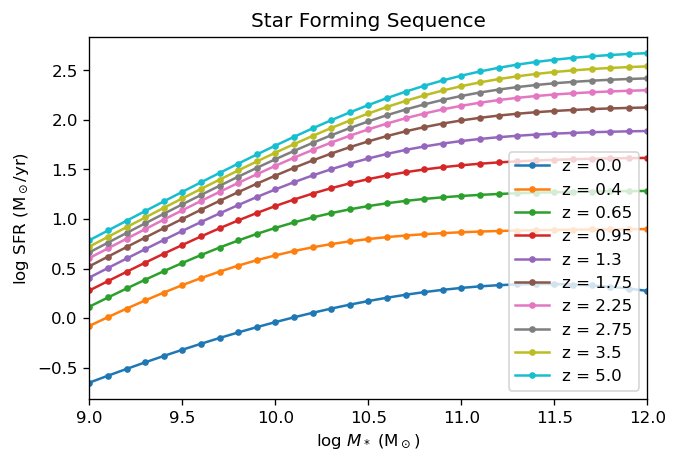

In [163]:
# Just execute this block - no coding necessary

z_sfr = np.array([0, 0.4, 0.65, 0.95, 1.3, 1.75, 2.25, 2.75, 3.5, 5.])
nz_sfr = len(z_sfr)
logSFR = np.zeros([nz_sfr, nm])

# Leslie+20 - Star-forming sequence at z > 0.4
t = np.array([13.7, 9.4, 7.64, 6.11, 4.86, 3.76, 2.95, 2.39, 1.82, 1.19])
S0 = 2.97
M0 = 11.06
a1 = 0.22
a2 = 0.12

fig, ax = plt.subplots()

# Saintonge+16 - z = 0
logSFR[0,:] = -2.332*logm + 0.4156*logm**2 - 0.01828*logm**3
plt.plot(logm, logSFR[0,:], '-o', ms=3)

for i in range(1,nz_sfr):
    logSFR[i,:] = S0 - a1*t[i] - np.log10(1+10.**(M0 - a2*t[i] - logm))
    plt.plot(logm, logSFR[i,:], '-o', ms=3)
    
ax.set_xlabel(r'log $M_*$ (M$_\odot$)')
ax.set_ylabel(r'log SFR (M$_\odot$/yr)')
ax.set_xlim(9, 12)
plt.title('Star Forming Sequence')
ax.legend(['z = ' + str(i) for i in z_sfr])

## Interpolate redshift evolution at a fixed mass (10 points)

Let's start by considering how each of these functions evolve for a single mass.  

Construct a high-resolution array of redshift from $z=0$ to $z=2.75$ (since this is the interval over which both functions have information) to which you want to interpolate.

Choose a single mass (in my example plots I have chosen $\log M_* = 11.5$, but you may choose any mass), and interpolate the SMF and SFS at that mass to your high-resolution redshift array.  Perform the interpolation twice, once with linear interpolation and once with a cubic spline, and plot the resulting functions.

**Note:** As mentioned at the top of the assignment, you should *write your own code* to perform the linear interpolation rather than calling interp1d.  You may use a modified version of the code from Tutorial 3.  I recommend that you define a *function* to perform linear interpolation, as you will have to do it a number of times in this assignment and it will be easier to write it once as a function than to copy-paste the code a bunch of times.  (You may call interp1d for the cubic spline.) 

In [164]:
# define linear interpolation function 
def interpLinear(xData, yData, highResX): 
    '''
    linear interpolation routine for xData and yData
    returns interpolated, high y data 
    
    xData: low res x-values of data, i.e the data we want to interpolate
    yData: low res y-values of data, i.e the data we want to inerpolate 
    highResX: array of high resolution x values; should have 0th element min(xData) and last element max(xData)
    '''
    # make a high resolution array of x-values (redshift)
    highResY = np.zeros(len(highResX))
    
    # loop over high res array: go up to second to last point because we consider consecutive pairs
    for index in range(len(xData)-1):
        
        #choose a pair of points 
        x0 = xData[index] 
        x1 = xData[index+1]
        y0 = yData[index]
        y1 = yData[index+1]
    
        # generate the indices we will be filling in the high res y
        inrange = (highResX >= x0) & (highResX < x1)

        # calc the line between points 
        highResY[inrange] = y0 + (y1-y0)/(x1-x0)*(highResX[inrange] - x0)
        
    
    return highResY



In [165]:
stellMass = 25  # this is the mass we choose to do our calcs with 
mass = logm[25]
print(mass)

11.5


In [166]:
# YOUR CODE HERE

# construct high resolution array of redshift 
highResX = np.linspace(0,2.75,200)

# perform linear interpolation of SMF
# xData = redshfts of stellar mass function ; yData = phi[all redshifts, mass index 27];  
xData_smf = z_smf
yData_smf = phi[:,stellMass]
interp_smfY = interpLinear(xData_smf,yData_smf, highResX)

# perform linear interpolation of SFR
# xData = redshifts of stellar formation sequence ; yData = log_sfr[all redshifts, mass index 27]
xData_sfr = z_sfr 
yData_sfr = logSFR[:, stellMass]
interp_sfrY = interpLinear(xData_sfr, yData_sfr, highResX)


# recall that scipy takes in data and creates a function of 'kind' order

# perform cubic interpolation of SMF
# make the cubic function for smf data
f_cubicSMF = interp1d(xData_smf,yData_smf, kind='cubic')
# make y values over the cubic function 
YcubicSMF = f_cubicSMF(highResX)

# perform cubic interpolation of SFS
f_cubicSFR = interp1d(xData_sfr,yData_sfr, kind='cubic')
YcubicSFR = f_cubicSFR(highResX)
print(len(interp_smfY), len(interp_sfrY))

200 200


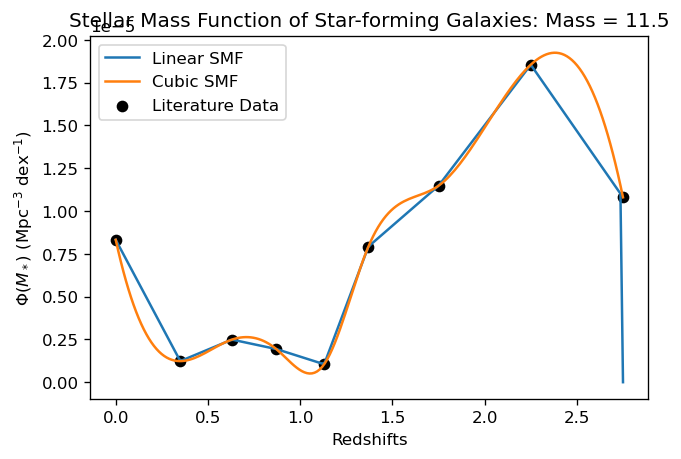

In [167]:
# plot all functions here 
fig, ax = plt.subplots()
plt.plot(highResX, interp_smfY, label = 'Linear SMF')
plt.plot(highResX, YcubicSMF, label = 'Cubic SMF')
plt.scatter(xData_smf, yData_smf, label = 'Literature Data',color = 'Black')
ax.set_xlabel("Redshifts")
ax.set_ylabel(r'$\Phi(M_*)$ (Mpc$^{-3}$ dex$^{-1}$)')
plt.title('Stellar Mass Function of Star-forming Galaxies: Mass = '+str(mass))
ax.legend()

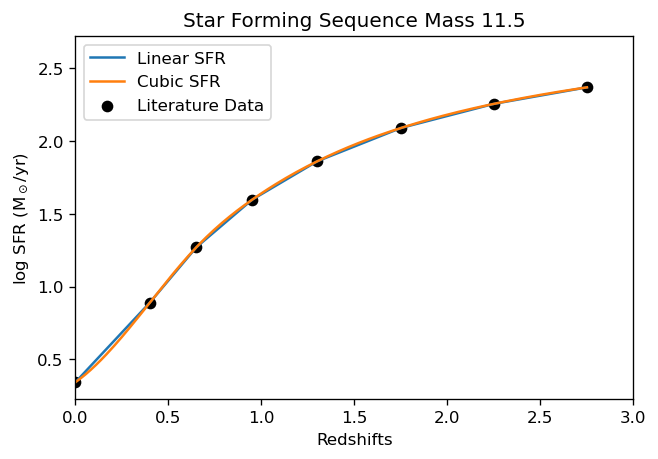

In [168]:
fig, ax = plt.subplots()
plt.plot(highResX, interp_sfrY, label = 'Linear SFR')
plt.plot(highResX, YcubicSFR, label = 'Cubic SFR')
plt.scatter(xData_sfr, yData_sfr, label = 'Literature Data',color = 'Black')
ax.set_xlabel("Redshifts")
ax.set_ylabel(r'log SFR (M$_\odot$/yr)')
ax.set_xlim([0,3])
plt.title('Star Forming Sequence Mass '+str(mass))
ax.legend()

## Calculate $\rho_{\rm SFR}$ at a single mass (10 points)

Now let's combine the two functions you interpolated above to calculate the star formation rate density $\rho_{\rm SFR}(z)|_{M_*}$ at that mass as a function of redshift.  This represents *the total amount of star formation happening in galaxies of mass $M_*$, averaged across the Universe at redshift z*.

Mathematically, this is
$$\rho_{\rm SFR}(z)|_{M_*} = \Phi(M_*,z) ~ {\rm SFR}(M_*,z)$$
and it will have units of M$_\odot$/yr/Mpc$^3$/dex.

You should have $\Phi(M_*,z)$ and ${\rm SFR}(M_*,z)$ at a fixed $M_*$ from the previous section.  Use them to calculate and plot $\rho_{\rm SFR}(z)|_{M_*}$.  Include both the linear and cubic interpolations.

**Hint:** Don't forget that you started off with an array of *log* SFR!

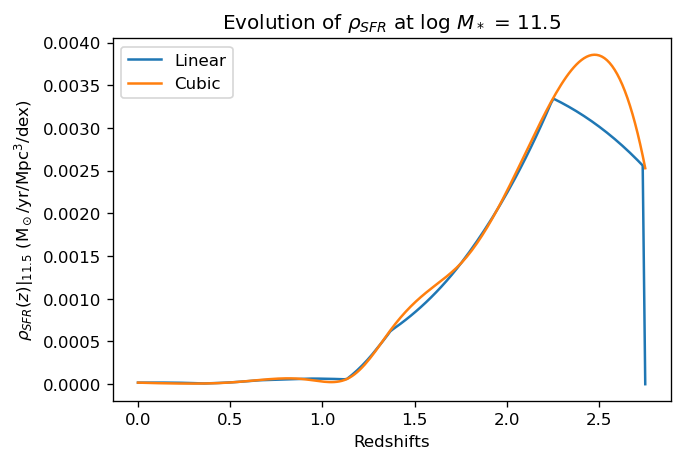

In [169]:
# YOUR CODE HERE

#multiply linear SMF with linear SFS;
#make sure to raise 10 to power of SMF 
linSFRd = interp_smfY * 10**interp_sfrY
cubicSFRd = YcubicSMF * 10**YcubicSFR


plt.plot(highResX, linSFRd, label = 'Linear')
plt.plot(highResX, cubicSFRd, label = 'Cubic')
#plt.scatter(xData_sfr, yData_smf*10**yData_sfr, label = 'Literature Data',color = 'Black')


plt.xlabel("Redshifts")
plt.ylabel(r"$\rho_{SFR}(z)|_{"+str(mass)+"}$ (M$_\odot$/yr/Mpc$^3$/dex)")
plt.title(r"Evolution of $\rho_{SFR}$ at log $M_*$ = "+str(mass))
plt.legend()

## Calculate global $\rho_{\rm SFR}$ across all masses (18 points)

Finally, we can calculate the global cosmic star formation rate $\rho_{\rm SFR}(z)$ by integrating the result from the previous section across all masses,

$$\rho_{\rm SFR}(z) = \int_{\log M_1}^{\log M_2} \Phi(\log M_*,z)~{\rm SFR}(\log M_*,z)~d\log M_*, $$

or in discrete terms,

$$\rho_{\rm SFR}(z) = \sum_i \Phi(\log M_{*,i},z)~{\rm SFR}(\log M_{*,i},z)~\Delta \log M_*. $$

Calculate and plot $\rho_{\rm SFR}(z)$ using both your linear and cubic interpolations.  You should find a result that looks similar to the curve we discussed in class!

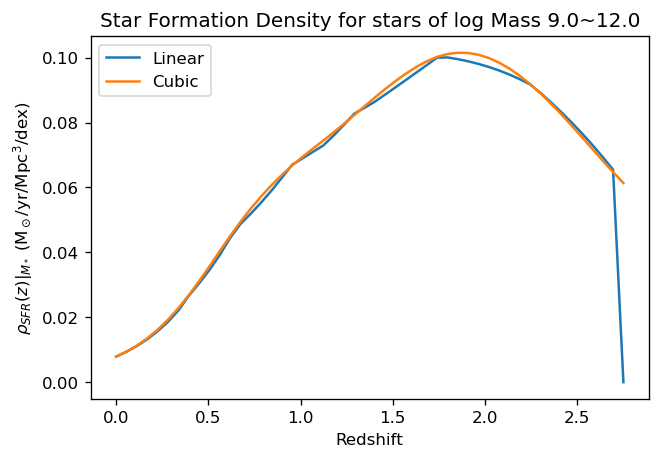

In [170]:
# YOUR CODE HERE
# create high res redshift 
highResX = np.linspace(0,2.75,50)
xData_smf = z_smf

totalLIN = np.zeros(len(highResX))
totalCUB = np.zeros(len(highResX))
# iterate over all possible masses
for mIndex in range(nm):
    # make the linear SMF data
    yData_smf = phi[:,mIndex]
    Ylinearsmf = interpLinear(xData_smf, yData_smf, highResX)
    
    # make the cubic SMF data 
    f_cubicSMF = interp1d(xData_smf,yData_smf, kind='cubic')
    YcubicSMF = f_cubicSMF(highResX)

    # make the linear SFS data 
    xData_sfr = z_sfr 
    yData_sfr = logSFR[:, mIndex]
    Ylinearsfr = interpLinear(xData_sfr, yData_sfr, highResX)
    
    # make the cubic SFS data 
    f_cubicSFR = interp1d(xData_sfr,yData_sfr, kind='cubic')
    YcubicSFR = f_cubicSFR(highResX)
    
    # note the difference in masses is dlogm = 0.1
    # create linear star formation density 
    totalLIN += Ylinearsmf*10**Ylinearsfr *.1
    
    # create cubic star formation density
    totalCUB += YcubicSMF*10**YcubicSFR *.1
    


plt.plot(highResX, totalLIN, label = 'Linear')
plt.plot(highResX, totalCUB, label = 'Cubic')
plt.title("Star Formation Density for stars of log Mass "+str(min(logm))+ "~"+str(max(logm)))
plt.xlabel("Redshift")
plt.ylabel(r"$\rho_{SFR}(z)|_{M_*}$ (M$_\odot$/yr/Mpc$^3$/dex)")
plt.legend()
plt.show()

    

**(1 point)**: How difficult / interesting was this assignment?  

*Your response here*

4/10 Difficulty 
7/10 interesting 

I asked a question about FLOPS/core in class this past week. I found this pretty cool table from Berkely describing CPU speed for various CPU models: 

https://setiathome.berkeley.edu/cpu_list.php
